# **Title of Project** - Customer Churn Prediction

-------------

## **Objective** 

We have given a Dataset of a Banking Customer who churned or not. This dataset consists 1000 entries with 13 columns which are "CustomerId","Surname","CreditScore","Geography", 	"Gender", 	"Age", 	"Tenure", 	"Balance", 	"Num Of Products", 	"Has Credit Card", 	"Is Active Member", 	"Estimated Salary", and "Churn"

## **Data Source**

Kaggle Link : https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/input

YBIFoundation Link : https://github.com/YBIFoundation/Dataset/blob/main/Big%20Sales%20Data.csv

## **Import Library**

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [2]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Describe Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.drop(columns='CustomerId',axis=1, inplace=True)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
num_cols = [i for i in df.columns if df[i].dtype != 'object']
cat_cols = [i for i in df.columns if df[i].dtype == 'object']
num_cols,cat_cols

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'Num Of Products',
  'Has Credit Card',
  'Is Active Member',
  'Estimated Salary',
  'Churn'],
 ['Surname', 'Geography', 'Gender'])

In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [11]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [12]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [14]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [15]:
df.loc[df['Balance']==0, 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [19]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     France        4204         4204    4204  4204    4204     4204   
      Germany       1695         1695    1695  1695    1695     1695   
      Spain         2064         2064    2064  2064    2064     2064   
1     France         810          810     810   810     810      810   
      Germany        814          814     814   814     814      814   
      Spain          413          413     413   413     413      413   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     France                4204             4204              4204   
      Germany               1695             1695              1695   
      Spain                 2064             2064              2064   
1     France                 810              810               810   
      Germany                814              814               814   
      Spain                  413              413               413   

                 Estimated Salary  
Churn Geography                    
0     France                 4204  
      Germany                1695  
      Spain                  2064  
1     France                  810  
      Germany                 814  
      Spain                   413

## **Data Visualization**

<AxesSubplot:>

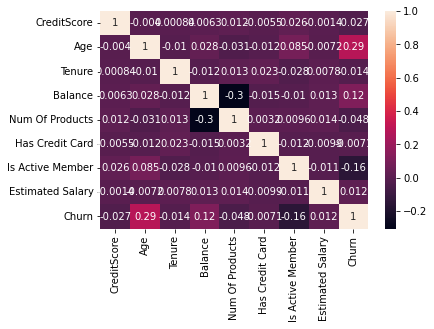

In [17]:
sns.heatmap(df.corr(), annot= True)

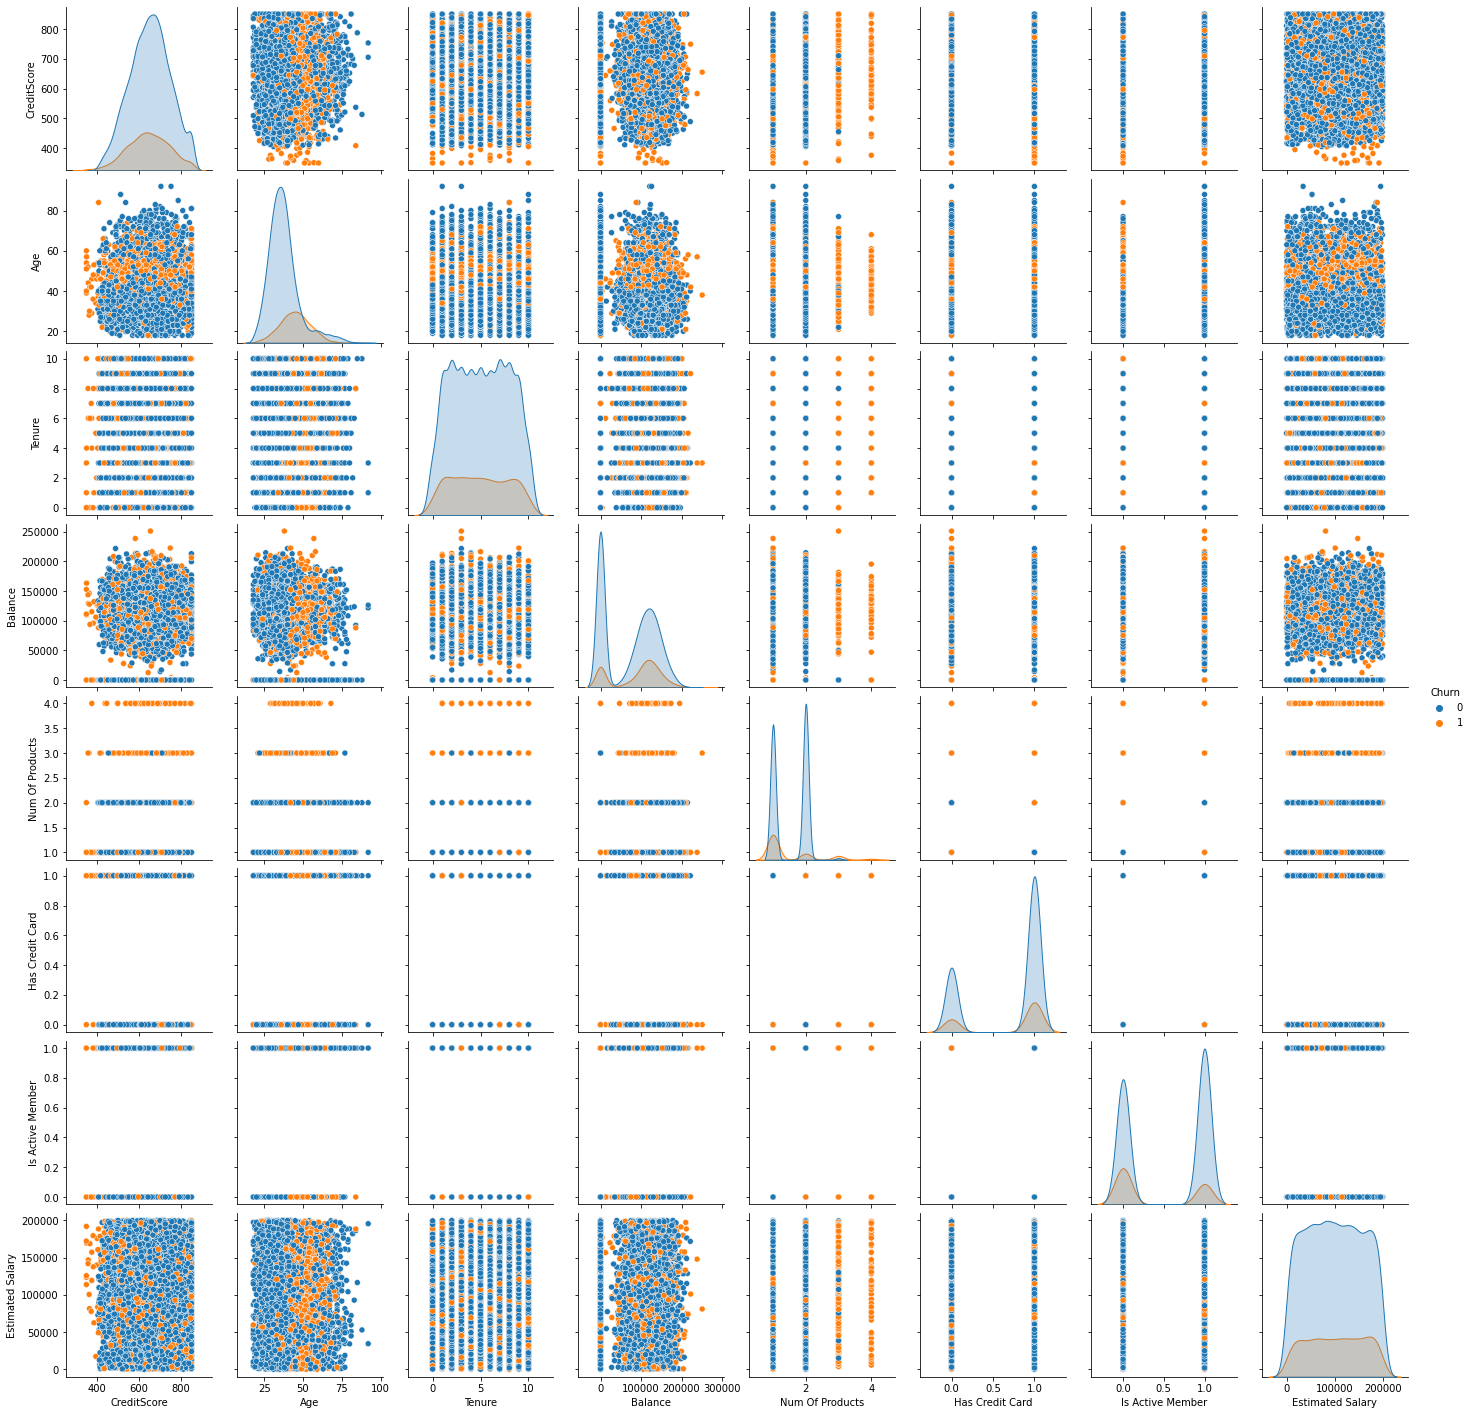

In [18]:
sns.pairplot(df, hue='Churn')

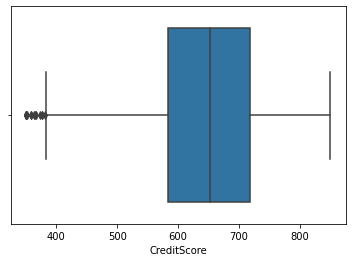

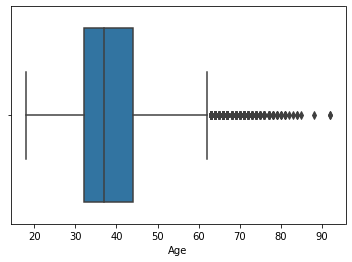

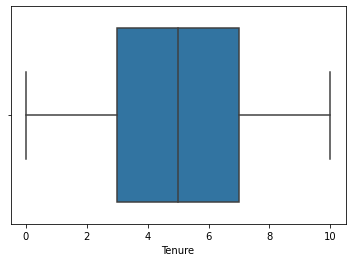

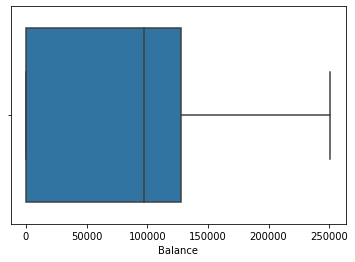

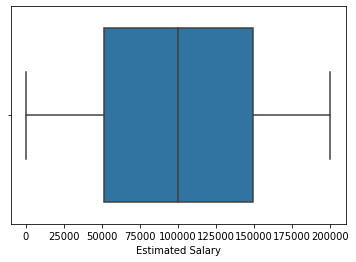

In [24]:
cols = ['CreditScore','Age','Tenure','Balance','Estimated Salary']
for i in cols:
    sns.boxplot(data = df, x= i, hue='Churn')
    plt.show()

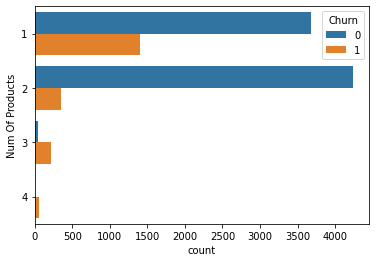

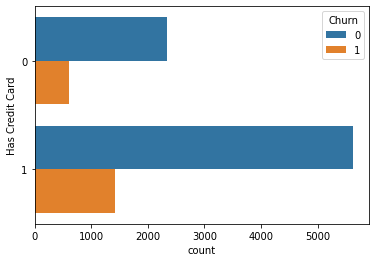

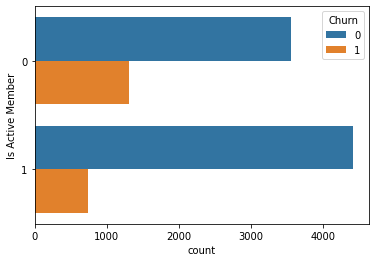

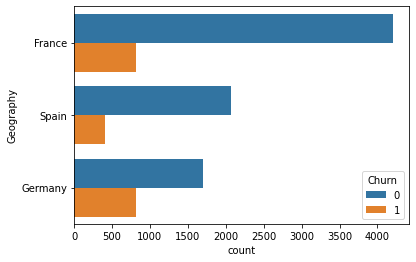

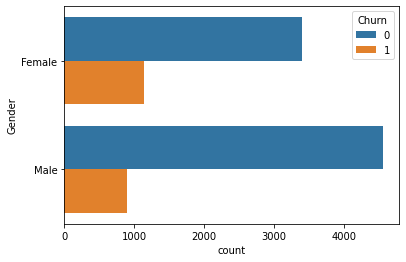

In [26]:
cols = [  'Num Of Products','Has Credit Card','Is Active Member','Geography', 'Gender']
for i in cols:
    sns.countplot(data = df, y= i, hue='Churn')
    plt.show()

## **Data Preprocessing**

In [35]:
df.replace({'Geography': {'France': 2, 'Germany':1, 'Spain' :0}}, inplace=True)
df.replace({'Gender': {'Male': 0, 'Female' :1}}, inplace=True)
df.replace({'Num of Products': {1: 0, 2:1, 3:1, 4:1 }}, inplace=True)

In [28]:
df['zero Balance'] = np.where(df['Balance']>0, 1 ,0)


## **Define Target Variable (y) and Feature Variables (X)**

In [36]:
X = df.drop(['Surname','Churn'], axis=1)
y = df['Churn']

In [38]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,zero Balance
0,619,2,1,42,2,0.00,1,1,1,101348.88,0
1,608,0,1,41,1,83807.86,1,0,1,112542.58,1
2,502,2,1,42,8,159660.80,3,1,0,113931.57,1
3,699,2,1,39,1,0.00,2,0,0,93826.63,0
4,850,0,1,43,2,125510.82,1,1,1,79084.10,1


In [31]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

In [39]:
X.shape,y.shape

((10000, 11), (10000,))

# Handling Imbalance Data

Random Under Sampling

In [41]:
from imblearn.under_sampling import RandomUnderSampler
rus =  RandomUnderSampler(random_state=42)
X_rus,y_rus = rus.fit_resample(X,y)

In [43]:
X_rus.shape, y_rus.shape,X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [44]:
y.value_counts(),y_rus.value_counts()

(0    7963
 1    2037
 Name: Churn, dtype: int64,
 0    2037
 1    2037
 Name: Churn, dtype: int64)

In [45]:
from imblearn.over_sampling import RandomOverSampler
ros =  RandomOverSampler(random_state=42)
X_ros,y_ros = ros.fit_resample(X,y)

In [47]:
X_ros.shape, y_ros.shape,X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [48]:
y.value_counts(),y_ros.value_counts()

(0    7963
 1    2037
 Name: Churn, dtype: int64,
 1    7963
 0    7963
 Name: Churn, dtype: int64)

## **Train Test Split**

In [58]:
from sklearn.model_selection import train_test_split as tts

#original Data 

X_train,X_test, y_train,y_test = tts(X,y, test_size=0.3, random_state=42)

In [59]:
# Random UnderSample Data
X_train_rus,X_test_rus, y_train_rus,y_test_rus = tts(X_rus,y_rus, test_size=0.3, random_state=42)
 
# Random OverSample Data
X_train_ros,X_test_ros, y_train_ros,y_test_ros = tts(X_ros,y_ros, test_size=0.3, random_state=42)

## **Modeling**

Standarize Feature

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [60]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
# Random UnderSample Data
X_train_rus = sc.fit_transform(X_train_rus)
X_test_rus = sc.transform(X_test_rus)
 
# Random OverSample Data
X_train_ros = sc.fit_transform(X_train_ros)
X_test_ros = sc.transform(X_test_ros)

Model- Suppor Vector Machine Classifier

In [62]:
from sklearn.svm import SVC
svc = SVC()

In [63]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [75]:
# Under Sampling Data
svc.fit(X_train_rus,y_train_rus)
y_pred_rus = svc.predict(X_test_rus)

In [76]:
#Over Sampling Data
svc.fit(X_train_ros,y_train_ros)
y_pred_ros = svc.predict(X_test_ros)

## **Model Evaluation**

In [77]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix, classification_report

In [79]:
print('For original Data')
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print("\nConfusion Martix: \n",confusion_matrix(y_test,y_pred))

For original Data
Accuracy:  0.8636666666666667
Precision:  0.8431372549019608
Recall:  0.3681506849315068

Confusion Martix: 
 [[2376   40]
 [ 369  215]]


In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.84      0.37      0.51       584

    accuracy                           0.86      3000
   macro avg       0.85      0.68      0.72      3000
weighted avg       0.86      0.86      0.84      3000



In [82]:
print('For UnderSampled Data')
print('Accuracy: ', accuracy_score(y_test_rus,y_pred_rus))
print('Precision: ', precision_score(y_test_rus,y_pred_rus))
print('Recall: ', recall_score(y_test_rus,y_pred_rus))
print("\nConfusion Martix: \n",confusion_matrix(y_test_rus,y_pred_rus))

For UnderSampled Data
Accuracy:  0.7579721995094031
Precision:  0.7469879518072289
Recall:  0.7444253859348199

Confusion Martix: 
 [[493 147]
 [149 434]]


In [83]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       640
           1       0.75      0.74      0.75       583

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



In [84]:
print('For OverSampled Data')
print('Accuracy: ', accuracy_score(y_test_ros,y_pred_ros))
print('Precision: ', precision_score(y_test_ros,y_pred_ros))
print('Recall: ', recall_score(y_test_ros,y_pred_ros))
print("\nConfusion Martix: \n",confusion_matrix(y_test_ros,y_pred_ros))

For OverSampled Data
Accuracy:  0.7965676015069066
Precision:  0.7814029363784666
Recall:  0.814625850340136

Confusion Martix: 
 [[1890  536]
 [ 436 1916]]


In [85]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2426
           1       0.78      0.81      0.80      2352

    accuracy                           0.80      4778
   macro avg       0.80      0.80      0.80      4778
weighted avg       0.80      0.80      0.80      4778



Hyper Parameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[0.1,1,10],
    'gamma':[1,0.1,0.05,0.01],
    'kernel':['rbf'],
    'class_weight': ['balanced']
}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose= 2, cv = 2)

In [71]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.05, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.05, kernel=rbf; total time=   4.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END ..C=1, class_weight=balanced, gamma

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.05, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [72]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.05)


In [74]:
y_pred_grid = grid.predict(X_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2416
           1       0.45      0.73      0.56       584

    accuracy                           0.78      3000
   macro avg       0.69      0.76      0.70      3000
weighted avg       0.83      0.78      0.79      3000



In [86]:
grid.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.05, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.05, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ..C=1, class_weight=balanced, gamma

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.05, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [87]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [88]:
y_pred_grid = grid.predict(X_test_rus)
print(classification_report(y_test_rus, y_pred_grid))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       640
           1       0.75      0.74      0.74       583

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223



In [92]:
grid.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  12.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  15.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   8.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.05, kernel=rbf; total time=   9.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.05, kernel=rbf; total time=   7.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   8.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   8.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=  11.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.6s
[CV] END .C=1, class_wei

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.05, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [93]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [94]:
y_pred_grid = grid.predict(X_test_ros)
print(classification_report(y_test_ros, y_pred_grid))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2426
           1       0.88      0.96      0.92      2352

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



## **Prediction**

In [97]:
model = grid

In [98]:
y_pred_grid = model.predict(X_test_ros)
print(classification_report(y_test_ros, y_pred_grid))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2426
           1       0.88      0.96      0.92      2352

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



## **Explaination**

- Before Hyper-parameter tuning:
    
    Out to original, underSampled and OverSampled Data, Over Sampled Data perform well with good recall and precesion and around 80%
- After tuning:

    Also, OverSampled Data model works very well with Supppor vector machine model with excellent recall and precision around 92%